In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import numpy.fft as fft
import collections
from scipy.signal import find_peaks, spectrogram, stft
from scipy.fft import fftshift
from matplotlib.colors import LogNorm

In [3]:
### VALEURS CONSTANTES
nCell = 100
##constantes
n = 2
alpha = 116
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 600
eta = 2.0
Q = 0.2
beta = []
for i in range(nCell):
    beta.append(random.gauss(1,0.05))
tau = 0.3 ##a voir

# EULER EXPLICITE

In [4]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = 0
b[:,0] = 40
c[:,0] = 0

A[:,0] = 0
B[:,0] = 0
C[:,0] = 0

S[:,0] = 0
Se[:,0] = 0

time = np.arange(0,t)

In [5]:
### Calcul des valeurs
for j in range(0, t-1):
    for i in range(0, nCell):
        a[i,j+1] = a[i,j] + tau *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        b[i,j+1] = b[i,j] + tau *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        c[i,j+1] = c[i,j] + tau *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        A[i,j+1] = A[i,j]+ tau*(beta[i]*(a[i,j]-A[i,j]))
        B[i,j+1] = B[i,j]+ tau*(beta[i]*(b[i,j]-B[i,j]))
        C[i,j+1] = C[i,j]+ tau*(beta[i]*(c[i,j]-C[i,j]))
        
        S[i,j+1] = S[i,j]+tau*((-k_s0*S[i,j])+(k_s1*A[i,j])-(eta*(S[i,j]-Se[i,j])))
        
        Se[i,j+1] = Q*np.mean(S[:,j])

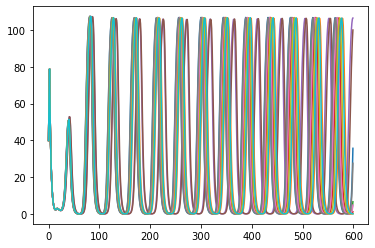

In [6]:
### Plot de b 
cellToPlot = [random.randint(0, 100) for p in range(0, 10)]

for i in cellToPlot:
    plt.plot(time,b[i])

In [7]:
### Calcul des fréquences
tot_freq=[]
for i in range(nCell):
    #plt.plot(time,b[i])

    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  4.,  4.,  7., 17.,  6., 19., 27.,  9.,  3.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 , 0.0212, 0.0214,
        0.0216, 0.0218, 0.022 , 0.0222, 0.0224, 0.0226, 0.0228, 0.023 ,
        0.0232, 0.0234, 0.0236, 0.0238, 0.024 , 0.0242, 0.0244, 0.0246,
        0.0248, 0.025 , 0.0252, 0.0254, 0.0256, 0.0258, 0.026 , 0.0262,
        0.0264, 0.0266, 0.0268, 0.027 , 0.0272, 0.0274, 0.0276, 0.0278,
        0.028 , 0.0282, 0.0284, 0.0286, 0.0288, 0.029 , 0.0292, 0.0294,
        0.0296, 0.0298, 0.03  ]),
 <BarContainer object of 50 artists>)

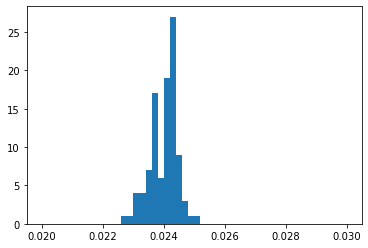

In [8]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# RANGE KUTA

In [9]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = random.randint(0,100)
b[:,0] = random.randint(0,100)
c[:,0] = random.randint(0,100)

A[:,0] = random.randint(0,100)
B[:,0] = random.randint(0,100)
C[:,0] = random.randint(0,100)

S[:,0] = random.randint(0,100)
Se[:,0] = random.randint(0,100)

In [10]:
### Calcul des valeurs
for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

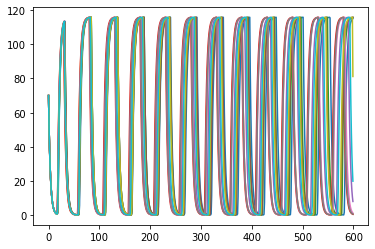

In [11]:
### Plot de b
cellToPlot = [random.randint(0, nCell) for p in range(0, 10)]

for i in cellToPlot:
    plt.plot(time,b[i])

In [12]:
### Calcul des fréquences
tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 :
            period = peaks[n+1]-peaks[n]
            periods.append(period)
            freq = 1/period
            freq = round(freq,5)
            freqs.append(freq)
        else:
            break
        n+=1
    tot_freq.append(np.mean(freqs))

(array([2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 , 0.0212, 0.0214,
        0.0216, 0.0218, 0.022 , 0.0222, 0.0224, 0.0226, 0.0228, 0.023 ,
        0.0232, 0.0234, 0.0236, 0.0238, 0.024 , 0.0242, 0.0244, 0.0246,
        0.0248, 0.025 , 0.0252, 0.0254, 0.0256, 0.0258, 0.026 , 0.0262,
        0.0264, 0.0266, 0.0268, 0.027 , 0.0272, 0.0274, 0.0276, 0.0278,
        0.028 , 0.0282, 0.0284, 0.0286, 0.0288, 0.029 , 0.0292, 0.0294,
        0.0296, 0.0298, 0.03  ]),
 <BarContainer object of 50 artists>)

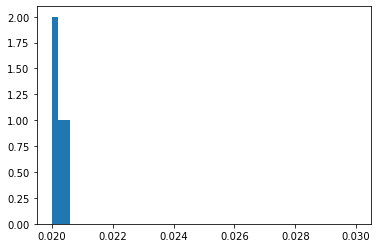

In [13]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# EULER IMPLICITE

In [14]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = random.randint(0,100)
b[:,0] = random.randint(0,100)
c[:,0] = random.randint(0,100)

A[:,0] = random.randint(0,100)
B[:,0] = random.randint(0,100)
C[:,0] = random.randint(0,100)

S[:,0] = random.randint(0,100)
Se[:,0] = random.randint(0,100)

In [15]:
### Calcul des valeurs

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        a[i,j+1] = a[i,j] + tau *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        b[i,j+1] = b[i,j] + tau *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        c[i,j+1] = c[i,j] + tau *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        A[i,j+1] = A[i,j] + tau*(beta[i]*(a[i,j]-A[i,j]))
        B[i,j+1] = B[i,j] + tau*(beta[i]*(b[i,j]-B[i,j]))
        C[i,j+1] = C[i,j] + tau*(beta[i]*(c[i,j]-C[i,j]))

        S[i,j+1] = S[i,j] + tau*((-k_s0*S[i,j])+(k_s1*A[i,j])-(eta*(S[i,j]-Se[i,j])))

        a[i,j] = a[i,j+1] - tau *(-a[i,j+1]+(alpha/(1+C[i,j+1]**n)))
        b[i,j] = b[i,j+1] - tau *(-b[i,j+1]+(alpha/(1+A[i,j+1]**n)))
        c[i,j] = c[i,j+1] - tau *(-c[i,j+1]+(alpha/(1+B[i,j+1]**n))+(kappa*S[i,j+1]/1+S[i,j+1]))

        A[i,j] = A[i,j+1] - tau*(beta[i]*(a[i,j+1]-A[i,j+1]))
        B[i,j] = B[i,j+1] - tau*(beta[i]*(b[i,j+1]-B[i,j+1]))
        C[i,j] = C[i,j+1] - tau*(beta[i]*(c[i,j+1]-C[i,j+1]))

        S[i,j] = S[i,j+1] - tau*((-k_s0*S[i,j+1])+(k_s1*A[i,j+1])-(eta*(S[i,j+1]-Se[i,j+1])))

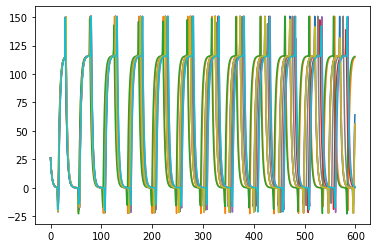

In [16]:
### Plot de b
cellToPlot = [random.randint(0, nCell) for p in range(0, 10)]

for i in cellToPlot:
    plt.plot(time,b[i])

In [17]:
### Calcul des fréquences
tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 :
            period = peaks[n+1]-peaks[n]
            periods.append(period)
            freq = 1/period
            freq = round(freq,5)
            freqs.append(freq)
        else:
            break
        n+=1
    tot_freq.append(np.mean(freqs))

(array([16.,  5., 33., 12., 10.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 , 0.0212, 0.0214,
        0.0216, 0.0218, 0.022 , 0.0222, 0.0224, 0.0226, 0.0228, 0.023 ,
        0.0232, 0.0234, 0.0236, 0.0238, 0.024 , 0.0242, 0.0244, 0.0246,
        0.0248, 0.025 , 0.0252, 0.0254, 0.0256, 0.0258, 0.026 , 0.0262,
        0.0264, 0.0266, 0.0268, 0.027 , 0.0272, 0.0274, 0.0276, 0.0278,
        0.028 , 0.0282, 0.0284, 0.0286, 0.0288, 0.029 , 0.0292, 0.0294,
        0.0296, 0.0298, 0.03  ]),
 <BarContainer object of 50 artists>)

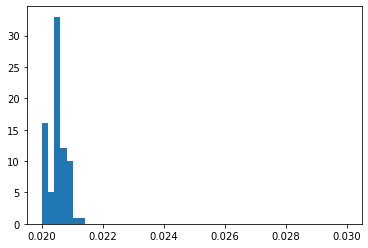

In [18]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# ANALYZE 

In [19]:
def M(t, b, nCell):
    return 1/nCell * sum(b[0:nCell,t])

In [20]:
def R(t1, t2, b, nCell):
    M_values = []
    b_values = []
    
    for t in range(t1, t2):
        M_values.append(M(t, b, nCell))
    
    num = np.mean(np.power(M_values,2)) - np.power(np.mean(M_values),2)

    for i in range(0, nCell):
        bi2_values = []
        b2i_values = []
        b2i_values.append(b[i,t1:t2]**2)
        bi2_values.append(b[i,t1:t2])
        
        b_values.append(np.mean(b2i_values) - np.mean(bi2_values)**2)     
    
    den = np.mean(b_values)
    
    return num/den

In [21]:
nCell = 10
##constantes
n = 2
alpha = 116
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 1000
eta = 2.0
tau = 0.3 ##a voir

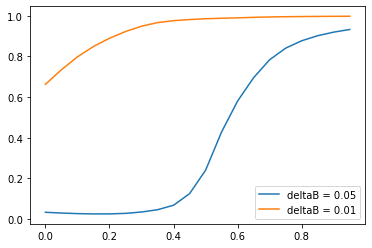

In [22]:
for deltaB in [0.05, 0.01]:
    Q_values = []
    R_values = []
    beta = []
    for i in range(nCell):
        beta.append(random.gauss(1, deltaB))
    for Q in np.arange(0, 1, 0.05):
        ### Initialisation des matrices
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = 0
        b[:,0] = 0
        c[:,0] = 0

        A[:,0] = 0
        B[:,0] = 0
        C[:,0] = 0

        S[:,0] = 0
        Se[:,0] = 0

        ### Calcul des valeurs
        for j in range(0, t-1):
            for i in range(0, nCell):
                Se[i, j] = Q * np.mean(S[:, j])

                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

                A[i,j+1] = A[i, j] + tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j] + tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j] + tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))
                
        Q_values.append(Q)
        R_values.append(R(900, 1000, b, nCell))
    plt.plot(Q_values, R_values, label= str("deltaB = " + str(deltaB)))
    plt.legend()


/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: inval

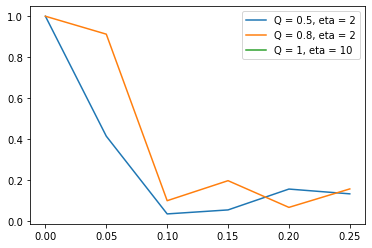

In [23]:
for Q, eta in (0.5, 2), (0.8, 2), (1, 10):
    deltaB_values = []
    R_values = []

    for deltaB in np.arange(0, 0.3, 0.05):

        beta = []
        for i in range(nCell):
            beta.append(random.gauss(1, deltaB))

        ### Initialisation des matrices
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = 0
        b[:,0] = 0
        c[:,0] = 0

        A[:,0] = 0
        B[:,0] = 0
        C[:,0] = 0

        S[:,0] = 0
        Se[:,0] = 0

        ### Calcul des valeurs
        for j in range(0, t-1):
            for i in range(0, nCell):
                Se[i, j] = Q * np.mean(S[:, j])

                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

        deltaB_values.append(deltaB)
        R_values.append(R(900, 1000, b, nCell))
    plt.plot(deltaB_values, R_values, label = str("Q = " + str(Q) + ", eta = " + str(eta)))
    plt.legend()

# Spectrogram

In [24]:
Frequency = np.array(tot_freq)

# Specgram

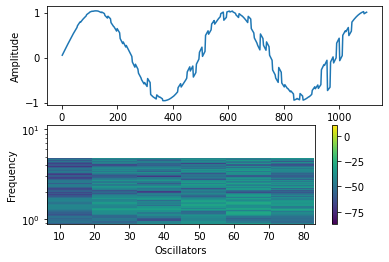

In [25]:
frequencies = Frequency
samplingFrequency = nCell

D = 0.04 # Noise

s1 = np.empty([0]) # For samples
s2 = np.empty([0]) # For signal

# Start Value of the sample
start   = 1

# Stop Value of the sample
stop    = samplingFrequency+1

for frequency in frequencies:
    sub1 = np.arange(start, stop, 1)

    # Signal - Sine wave with varying frequency + Noise
    sub2 = np.sin(2*np.pi*sub1*frequency*1/samplingFrequency) + D

    s1      = np.append(s1, sub1)
    s2      = np.append(s2, sub2)
  
    start   = stop+1
    stop    = start+samplingFrequency

# Plot the signal

plt.subplot(2,1,1)
plt.plot(s1,s2)
plt.xlabel('Sample')
plt.ylabel('Amplitude')


# Plot the spectrogram

plt.subplot(2,1,2)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(s2, Fs=samplingFrequency, sides='twosided')
plt.yscale('log')
plt.xlabel('Oscillators')
plt.ylabel('Frequency')

plt.colorbar()
plt.show()   

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  """


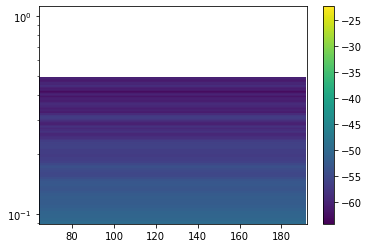

In [26]:
dt = 0.005
t = np.arange(0.0, 20.0, dt)
x = Frequency

plt.specgram(x, Fs=1, sides='twosided')
plt.yscale('log')
plt.colorbar()
plt.show()

In [27]:
print(Frequency)

[0.01992909 0.01978818 0.01978818 0.02000182 0.02000182 0.02083
 0.02000182 0.01992909 0.02067727 0.02113    0.02044818 0.02048636
 0.02075364 0.02000182 0.02083    0.01978818 0.02079182 0.02067727
 0.01992909 0.02083    0.02037273 0.01996455 0.01992909 0.02056273
 0.02000364 0.02041    0.02052455 0.02018636 0.018915   0.02079182
 0.02075364 0.01954273 0.01940545 0.02041    0.02044818 0.02044818
 0.02041    0.02041    0.02087364 0.02041    0.02037273 0.02083273
 0.02041    0.01944091 0.02000182 0.02041    0.01968182 0.02075364
 0.02041    0.02083    0.02041    0.02044818 0.02083    0.01961273
 0.02041    0.02004091 0.02083    0.02099636 0.02044818 0.02041
 0.02041    0.01978727 0.02044818 0.02067727 0.02071545 0.01982273
 0.02011364 0.01964727 0.02000182 0.02041    0.02052455 0.01971818
 0.02022364 0.02004091 0.02000182 0.01989455 0.021205   0.02004091
 0.019313   0.02041    0.02041    0.02037273 0.02060091 0.02044818
 0.02022364 0.02083    0.02075364 0.01940818 0.02041    0.02014909
 

# Nouvelle tentative


(array([ 1.,  1.,  4., 10., 18.,  6., 33.,  9., 15.,  3.]),
 array([0.018915, 0.019144, 0.019373, 0.019602, 0.019831, 0.02006 ,
        0.020289, 0.020518, 0.020747, 0.020976, 0.021205]),
 <BarContainer object of 10 artists>)

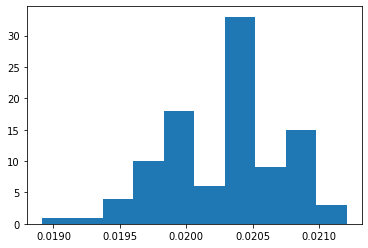

In [28]:
plt.hist(Frequency)

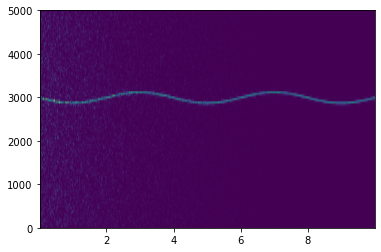

/home/kevin/anaconda3/envs/MLB/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))


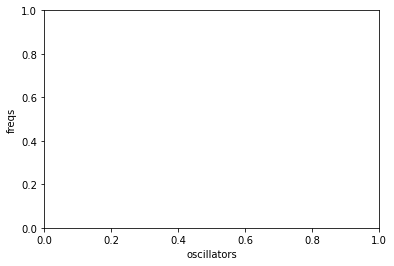

In [29]:
#noise = 0.04
Tau = 0

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
f, t, Sxx = spectrogram(x, fs)

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.show()

Graphe = spectrogram(Frequency,fs=1, nperseg=None, return_onesided=False)
plt.ylabel('freqs')
plt.xlabel('oscillators')
plt.show()

In [30]:
Graphe

(array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
         0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
         0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
        -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
        -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
        -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
        -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
        -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
        -0.01]),
 array([50.]),
 array([[2.13816586e-08],
        [2.15544704e-08],
        [2.35647699e-07],
        [2.03801254e-07],
        [2.53787756e-07],
        [1.28475515e-07],
        [1.96879310e-08],
     

In [31]:
Fourier = stft(Frequency)